In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
logins_df = pd.read_json("logins.json")
#logins_df.reset_index()
#logins_df.index = logins_df['login_time']
logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
logins_df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [4]:
logins_df.sort_index(inplace=True)
logins_df.set_index('login_time', inplace=True)
logins_df.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


In [5]:
logins_df.tail()

""
login_time
1970-04-13 18:50:19
1970-04-13 18:43:56
1970-04-13 18:54:02
1970-04-13 18:57:38
1970-04-13 18:54:23


In [6]:
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Empty DataFrame

In [7]:
logins_df['count'] = 1
logins_agg_df = logins_df.resample("15min").sum()
logins_agg_df.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [8]:
logins_agg_df.tail()

,count
login_time,
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2
1970-04-13 18:30:00,7
1970-04-13 18:45:00,6


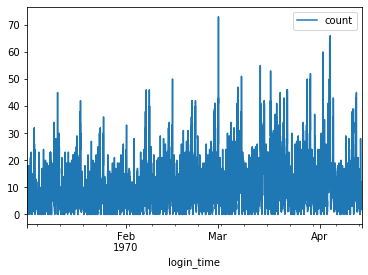

In [9]:
logins_agg_df.plot()
plt.show()

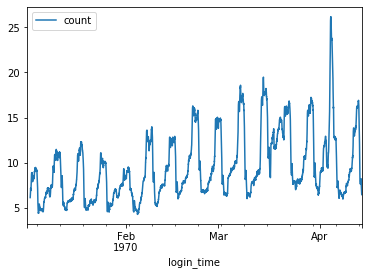

In [10]:
logins_agg_df.rolling(window=96).mean().plot()
plt.show()

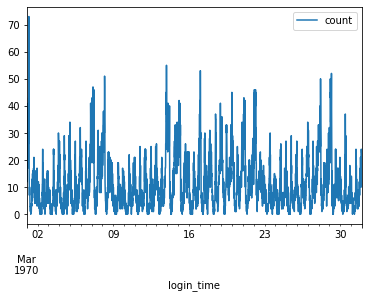

In [11]:
logins_agg_df.loc['1970-03'].plot()
plt.show()

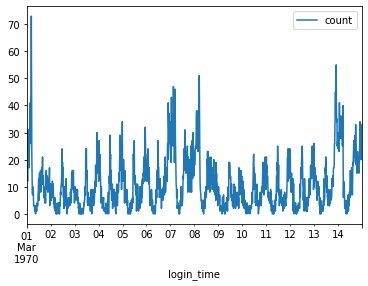

In [12]:
logins_agg_df.loc['1970-03-01' : '1970-03-14'].plot()
plt.show()

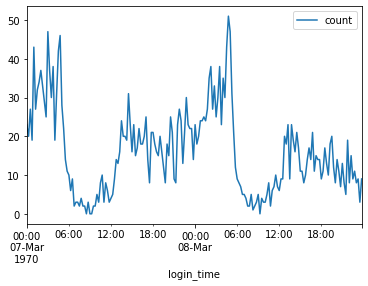

In [13]:
# Week End - mar 7 1970 - saturday , mar 8 1970 - sunday
logins_agg_df.loc['1970-03-07':'1970-03-08'].plot()
plt.show()

From Above graph , we can see on weekends , <br>
>Saturday & Sunday , 12 AM to 6 AM     : Demand is Highest <br>
>                    6 AM to 12 PM     : Demand is lowest <br>
>                    12 PM to 11:59 PM : Demand is moderate <br>

Lets Validate this on some other weekends.

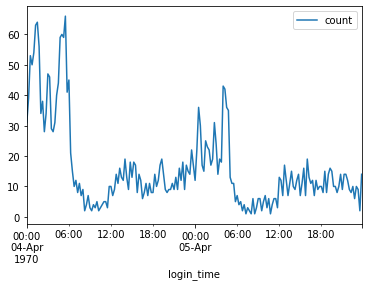

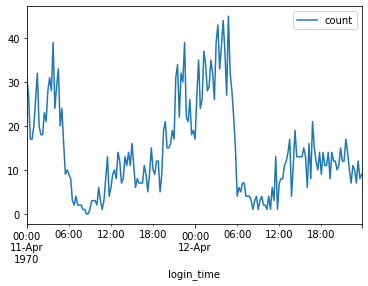

In [14]:
# 4th - 5th April , 11th - 12th April
logins_agg_df.loc['1970-04-04':'1970-04-05'].plot()
logins_agg_df.loc['1970-04-11':'1970-04-12'].plot()
plt.show()

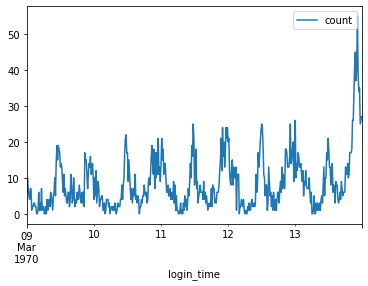

In [15]:
# Week days - mar 9 1970 - Monday -  mar 13 1970 - Friday
logins_agg_df.loc['1970-03-09':'1970-03-13'].plot()
plt.show()

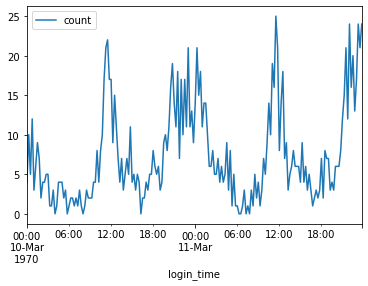

In [16]:
# Week day - mar 10 1970 - Tuesday -  mar 11 1970 - Wednesday
logins_agg_df.loc['1970-03-10':'1970-03-11'].plot()
plt.show()

Trend is similar to that of weekend. But over all count demand is much lower than that of weekend.
Hence highest demand time during weekdays is comparable to moderate demad times during weekends.


# Conclusions from above analysis:

- Demand is Higher on the weekends than weekdays.
- Demand is Highest from 12 AM and 6 AM for both weekdays and weekends.
- Schedule : 
>    12 AM to 6 AM : Demand is Highest <br>
>    6 AM to 12 PM : Demand is lowest <br>
>    12 PM to 11:59 PM : Demand is moderate <br>

- Over all demand is higher during weekends. <br>
- Highest demand time during weekdays is comparable to moderate demad times during weekends.